<a href="https://colab.research.google.com/github/phice421/-Redu-o-de-Dimensionalidade/blob/main/Redu%C3%A7%C3%A3o_de_Dimensionalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IA & Big Data**



In [ ]:
# Importando as bibliotecas para os modelos
import pandas as pd

# Modelos de Machine Learning
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Grid Search e Ajuste nos dados
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Métricas de Desempenho
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score, ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.metrics import adjusted_rand_score

# Google Drive
from google_drive_downloader import GoogleDriveDownloader as gdd

# Plot dos gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o PCA:
from sklearn.decomposition import PCA

# Importando o Numpy
import numpy as np

# Redução de Dimensionalidade (PCA)

## Conjunto de dados da aula

O robô **SCITOS G5** foi objeto de estudo de um modelo de um robô que segue parede de forma autonoma. Nesse estudo foram coletados dados dos 24 sensores ultrassônicos instalados ao redor do robô (ver imagem 1).


**Referencia do dataset e do artigo dessa questão:**

Ananda L. Freire, Guilherme A. Barreto, Marcus Veloso and Antonio T. Varela (2009),
	"Short-Term Memory Mechanisms in Neural Network Learning of Robot Navigation
	Tasks: A Case Study". Proceedings of the 6th Latin American Robotics Symposium (LARS'2009),
	Valparaíso-Chile, pages 1-6, DOI: 10.1109/LARS.2009.5418323

<img src='https://drive.google.com/uc?id=1Sd3MvhItVs-4ufbmtcMBsWkdLZJnClud' width=300>


*Figura 1 - robô SCITOS G5*




O objetivo do robô era conseguir seguir uma parede evitando eventuais colisões. Esse robô foi testado com diversos algoritmos e os dados dos valores desses sensores, assim como o movimento que o robô deveria fazer, foram armazenados em um conjunto de dados. A imagem a seguir ilustra as rotas realizadas pelo robô.


<img src="https://drive.google.com/uc?id=1xey3l885AKnBiB9cR_3S9SglY9oLd0Qu" width=800>

*Figura 2 - Exemplo de trajetória executada pelo robô*

A seguir temos uma descrição dos diversos sensores do robô instalados no robô

  
1. US1: Sensor ultrassônico na parte frontal do robô (ângulo de referência: 180°) - (numeric: real)

2. US2: Leitura do sensor ultrassônico (ângulo de referência: -165°) - (numeric: real)

3. US3: Leitura do sensor ultrassônico (ângulo de referência: -150°) - (numeric: real)

4. US4: Leitura do sensor ultrassônico (ângulo de referência: -135°) - (numeric: real)

5. US5: Leitura do sensor ultrassônico (ângulo de referência: -120°) - (numeric: real)

6. US6: Leitura do sensor ultrassônico (ângulo de referência: -105°) - (numeric: real)

7. US7: Leitura do sensor ultrassônico (ângulo de referência: -90°) - (numeric: real)

8. US8: Leitura do sensor ultrassônico (ângulo de referência: -75°) - (numeric: real)

9. US9: Leitura do sensor ultrassônico (ângulo de referência: -60°) - (numeric: real)

10. US10: Leitura do sensor ultrassônico (ângulo de referência: -45°) - (numeric: real)

11. US11: Leitura do sensor ultrassônico (ângulo de referência: -30°) - (numeric: real)

12. US12: Leitura do sensor ultrassônico (ângulo de referência: -15°) - (numeric: real)

13. US13: Sensor ultrassônico na parte traseira do robô  t (ângulo de referência: 0°) - (numeric: real)

14. US14: Leitura do sensor ultrassônico (ângulo de referência: 15°) - (numeric: real)

15. US15: Leitura do sensor ultrassônico (ângulo de referência: 30°) - (numeric: real)

16. US16: Leitura do sensor ultrassônico (ângulo de referência: 45°) - (numeric: real)

17. US17: Leitura do sensor ultrassônico (ângulo de referência: 60°) - (numeric: real)

18. US18: Leitura do sensor ultrassônico (ângulo de referência: 75°) - (numeric: real)

19. US19: Leitura do sensor ultrassônico (ângulo de referência: 90°) - (numeric: real)

20. US20: Leitura do sensor ultrassônico (ângulo de referência: 105°) - (numeric: real)

21. US21: Leitura do sensor ultrassônico (ângulo de referência: 120°) - (numeric: real)

22. US22: Leitura do sensor ultrassônico (ângulo de referência: 135°) - (numeric: real)

23. US23: Leitura do sensor ultrassônico (ângulo de referência: 150°) - (numeric: real)

24. US24: Leitura do sensor ultrassônico (ângulo de referência: 165°) - (numeric: real)

25. Classes (target):

    -- Move-Forward - Mover para frente

    -- Slight-Right-Turn - Curva leve à direita

    -- Sharp-Right-Turn - Curva acentuada à direita

    -- Slight-Left-Turn - Curva leve à direita


## Tarefa #1: Recebendo os dados

In [ ]:
data_google_id = '18jiZdkIufjJIbeWxk3URWrIQHO0IPWxZ'
gdd.download_file_from_google_drive(file_id=data_google_id,
                                    dest_path = './dados.csv',
                                    showsize = True,
                                    overwrite=True)
dados = pd.read_csv("dados.csv", sep=',')

800.0 KiB Done.


## Tarefa #2: Analise Exploratória dos Dados

In [ ]:
dados.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,funcao_robo
0,0.438,0.498,3.625,3.645,5.0,2.918,5.0,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,Slight-Right-Turn
1,0.438,0.498,3.625,3.648,5.0,2.918,5.0,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,Slight-Right-Turn
2,0.438,0.498,3.625,3.629,5.0,2.918,5.0,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,Slight-Right-Turn
3,0.437,0.501,3.625,3.626,5.0,2.918,5.0,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,Slight-Right-Turn
4,0.438,0.498,3.626,3.629,5.0,2.918,5.0,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,Slight-Right-Turn


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sensor_1     5442 non-null   float64
 1   sensor_2     5442 non-null   float64
 2   sensor_3     5442 non-null   float64
 3   sensor_4     5442 non-null   float64
 4   sensor_5     5442 non-null   float64
 5   sensor_6     5442 non-null   float64
 6   sensor_7     5442 non-null   float64
 7   sensor_8     5442 non-null   float64
 8   sensor_9     5442 non-null   float64
 9   sensor_10    5442 non-null   float64
 10  sensor_11    5442 non-null   float64
 11  sensor_12    5442 non-null   float64
 12  sensor_13    5442 non-null   float64
 13  sensor_14    5442 non-null   float64
 14  sensor_15    5442 non-null   float64
 15  sensor_16    5442 non-null   float64
 16  sensor_17    5442 non-null   float64
 17  sensor_18    5442 non-null   float64
 18  sensor_19    5442 non-null   float64
 19  sensor

Desse conjunto de dados podemos ver que o mesmo possui váriaveis do float. A única coluna do tipo object é a coluna com a ação que o robô deve executar. Logo não há a necessidade do uso de *One Hot Encoding* ou *Label Encoding*


In [ ]:
dados.shape

(5456, 25)

In [ ]:
dados.isnull().sum()

sensor_1       14
sensor_2       14
sensor_3       14
sensor_4       14
sensor_5       14
sensor_6       14
sensor_7       14
sensor_8       14
sensor_9       14
sensor_10      14
sensor_11      14
sensor_12      14
sensor_13      14
sensor_14      14
sensor_15      14
sensor_16      14
sensor_17      14
sensor_18      14
sensor_19      14
sensor_20      14
sensor_21      14
sensor_22      14
sensor_23      14
sensor_24      14
funcao_robo    14
dtype: int64

Temos valores nulos que deverão ser tratados! Iremos substituir pela mediana de cada coluna.

In [ ]:
dados.loc[:,'sensor_1':'sensor_13'].describe()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13
count,5442.00000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000
mean,1.47179,2.326341,2.489948,2.797322,2.957098,2.892281,3.353062,2.541642,3.124444,2.831949,2.551669,2.077868,2.126134
std,0.80340,1.410248,1.248046,1.309191,1.338176,1.281874,1.413295,1.111502,1.356426,1.306933,1.382810,1.249223,1.407631
min,0.40000,0.437000,0.470000,0.833000,1.120000,1.114000,1.122000,0.859000,0.836000,0.810000,0.783000,0.778000,0.770000
25%,0.92100,1.362000,1.539250,1.731250,1.774000,1.785250,1.931000,1.618250,1.799250,1.636000,1.580000,1.293000,1.189500
50%,1.33400,1.900500,2.064000,2.460500,2.666500,2.682500,3.226000,2.174000,2.802000,2.679000,2.003000,1.689000,1.609000
75%,1.81400,2.684500,2.740750,4.094500,4.313000,3.830500,5.000000,3.193000,5.000000,3.523500,3.226000,2.284500,2.359250
max,5.00000,5.025000,5.029000,5.017000,5.000000,5.005000,5.008000,5.087000,5.000000,5.022000,5.019000,5.000000,5.003000


In [ ]:
dados.loc[:,'sensor_13':].describe()

,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24
count,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000,5442.000000
mean,2.126134,2.189510,2.207144,1.201435,0.990570,0.910477,1.058291,1.075040,1.016266,1.778128,1.554798,1.577263
std,1.407631,1.576012,1.716399,1.097361,0.943122,0.890029,1.144670,1.139257,0.888216,1.572291,1.291143,1.149573
min,0.770000,0.756000,0.495000,0.424000,0.373000,0.354000,0.340000,0.355000,0.380000,0.370000,0.367000,0.377000
25%,1.189500,1.031250,0.860000,0.691000,0.581000,0.530000,0.523250,0.541000,0.567000,0.742250,0.792000,0.884000
50%,1.609000,1.493000,1.329000,0.803000,0.738000,0.685000,0.691000,0.693000,0.763500,1.030000,1.071000,1.289000
75%,2.359250,2.736500,4.447000,1.158750,0.913000,0.837000,0.857000,0.862750,1.002750,2.067750,1.560500,1.657000
max,5.003000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Todas as colunas com os sensores tem valores da mesma ordem de grandeza. Logo não há a necessidade de alterar a escala dos dados.

Vamos analisar as possibilidades de movimentos do robô:

<Axes: xlabel='funcao_robo', ylabel='count'>

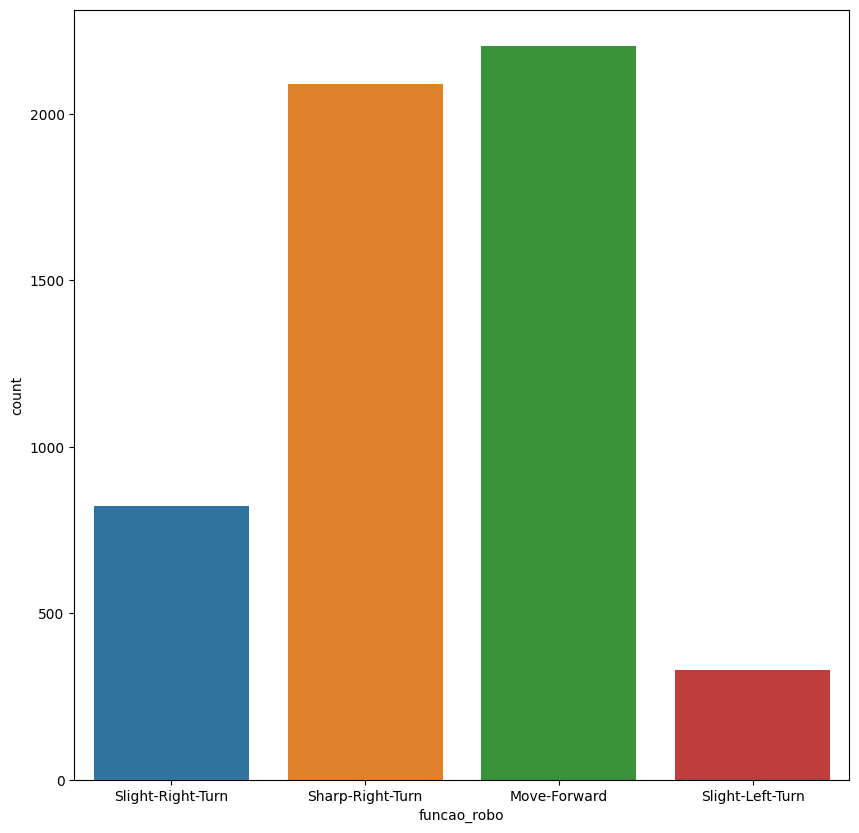

In [ ]:
sns.countplot(data=dados, x='funcao_robo')

In [ ]:
dados['funcao_robo'].value_counts()

Move-Forward         2203
Sharp-Right-Turn     2090
Slight-Right-Turn     821
Slight-Left-Turn      328
Name: funcao_robo, dtype: int64

## Tarefa #3: Corrigindo o problema dos dados

### Substituindo os valores nulos pela mediana

Para as colunas dos valores dos sensores iremos substituir os mesmos pela mediana de cada coluna:

In [ ]:
colunas = list(dados.columns)
colunas

In [ ]:
colunas.pop()
colunas

['sensor_1',
 'sensor_2',
 'sensor_3',
 'sensor_4',
 'sensor_5',
 'sensor_6',
 'sensor_7',
 'sensor_8',
 'sensor_9',
 'sensor_10',
 'sensor_11',
 'sensor_12',
 'sensor_13',
 'sensor_14',
 'sensor_15',
 'sensor_16',
 'sensor_17',
 'sensor_18',
 'sensor_19',
 'sensor_20',
 'sensor_21',
 'sensor_22',
 'sensor_23',
 'sensor_24']

In [ ]:
for col in colunas:
  mediana = dados[col].median()
  dados[col].fillna(mediana, inplace = True)

In [ ]:
dados.isnull().sum()

sensor_1        0
sensor_2        0
sensor_3        0
sensor_4        0
sensor_5        0
sensor_6        0
sensor_7        0
sensor_8        0
sensor_9        0
sensor_10       0
sensor_11       0
sensor_12       0
sensor_13       0
sensor_14       0
sensor_15       0
sensor_16       0
sensor_17       0
sensor_18       0
sensor_19       0
sensor_20       0
sensor_21       0
sensor_22       0
sensor_23       0
sensor_24       0
funcao_robo    14
dtype: int64

Na coluna função_robô temos apenas 14 valores nulos. Iremos remover esses valores pois temos mais de 5000 linhas nesse conjunto de dados.

In [ ]:
dados.dropna(inplace=True)

In [ ]:
dados.isnull().sum()

sensor_1       0
sensor_2       0
sensor_3       0
sensor_4       0
sensor_5       0
sensor_6       0
sensor_7       0
sensor_8       0
sensor_9       0
sensor_10      0
sensor_11      0
sensor_12      0
sensor_13      0
sensor_14      0
sensor_15      0
sensor_16      0
sensor_17      0
sensor_18      0
sensor_19      0
sensor_20      0
sensor_21      0
sensor_22      0
sensor_23      0
sensor_24      0
funcao_robo    0
dtype: int64

### Ajustando o desbalanceamento da coluna de saída dos dados (EXTRA - Datasets desbalanceados)

In [ ]:
# Dividindo os dados em entrada e saída:
X = dados.drop(columns=["funcao_robo"])
# Criando uma variavel para os labels
y = dados["funcao_robo"]

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X,y)

In [ ]:
dados = pd.concat([X_resampled, y_resampled], axis = 1)

<Axes: xlabel='funcao_robo', ylabel='count'>

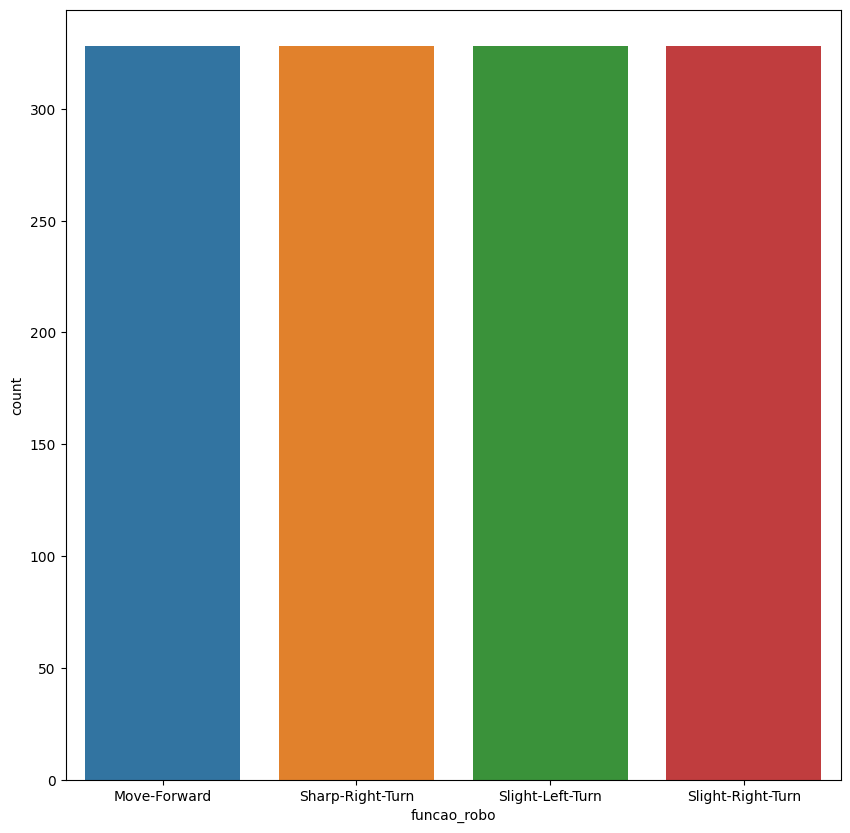

In [ ]:
sns.countplot(data=dados, x='funcao_robo')

##Tarefa #4: Utilizando o PCA para redimensionar os dados

In [ ]:
# Dividindo os dados em entrada e saída:
X = dados.drop(columns=["funcao_robo"])
# Criando uma variavel para os labels
y = dados["funcao_robo"]

In [ ]:
# Criando um modelo do PCA sem definir o número de componentes
pca = PCA()
pca.fit(X)

PCA()

Analisando os itens usados para gerar o nosso gráfico

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.22069013, 0.37301415, 0.45554641, 0.51997967, 0.57459134,
       0.6233498 , 0.66666317, 0.70536163, 0.73811789, 0.76682792,
       0.79218068, 0.81659884, 0.83948969, 0.86140635, 0.88077988,
       0.89833457, 0.91496879, 0.93022409, 0.9444051 , 0.95760648,
       0.97049821, 0.98201261, 0.99210337, 1.        ])

In [ ]:
np.cumsum(pca.explained_variance_ratio_).shape

(24,)

In [ ]:
list(range(1, np.cumsum(pca.explained_variance_ratio_).shape[0]+1))

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [ ]:
np.cumsum(pca.explained_variance_ratio_).shape[0]+1

25

Gerando o gráfico

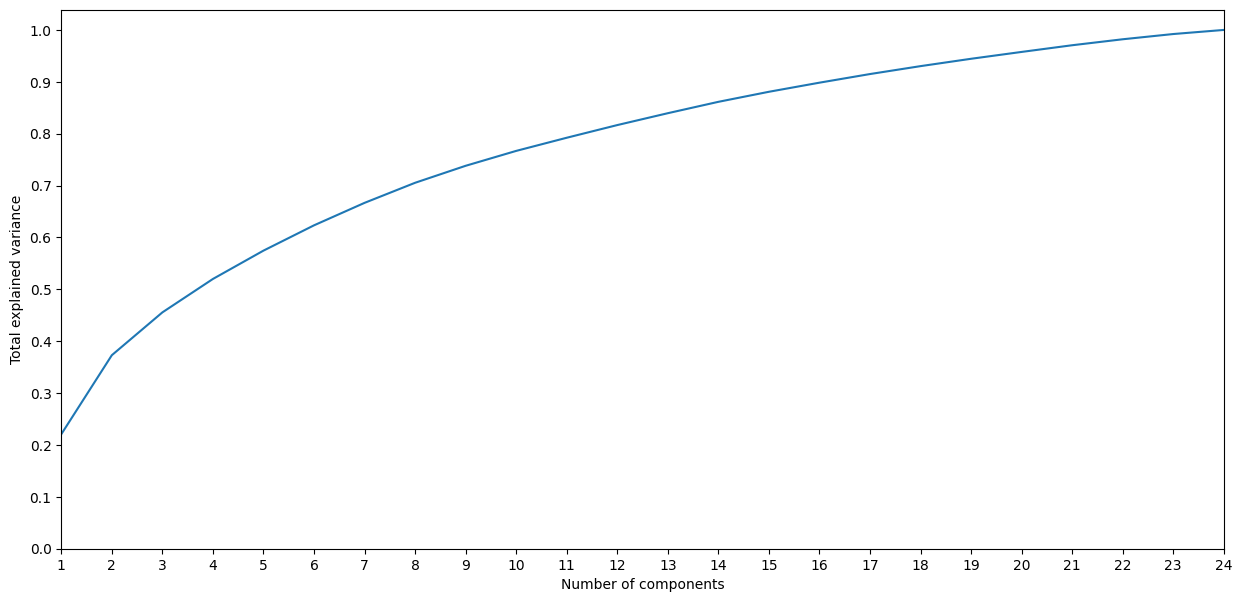

In [ ]:
# Plotando o gráfico para encontrar o cotovelo
plt.figure(figsize=(15,7))
k = list(range(1, np.cumsum(pca.explained_variance_ratio_).shape[0]+1))
sns.lineplot(x=k, y=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(1, 24)
plt.xticks(np.arange(1, 25, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show();

Nesse caso o método do cotovelo não ficou tão evidente nos dados. Iremos adotar para testes 10 componentes.

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.22069013, 0.37301415, 0.45554641, 0.51997967, 0.57459134,
       0.6233498 , 0.66666317, 0.70536163, 0.73811789, 0.76682792,
       0.79218068, 0.81659884, 0.83948969, 0.86140635, 0.88077988,
       0.89833457, 0.91496879, 0.93022409, 0.9444051 , 0.95760648,
       0.97049821, 0.98201261, 0.99210337, 1.        ])

In [ ]:
pca = PCA(n_components=6)
pca_res = pca.fit_transform(X)

In [ ]:
pca_res.shape

(1312, 6)

In [ ]:
dados_pca = pd.DataFrame(pca_res)
dados_pca.head()

,0,1,2,3,4,5
0,-4.193228,1.093891,1.713417,-2.165004,-1.680306,0.334202
1,-2.476217,1.965971,-4.085691,-1.977281,-0.524155,-0.281438
2,-2.345518,4.842103,-1.208553,1.108218,-1.511786,-0.907185
3,1.254054,-3.877623,-0.242836,0.989200,-1.972595,0.228335
4,-0.392250,-1.518633,3.563495,1.749209,-2.545788,-2.025420


Vamos ver como é a representatividade da distribuição dos dados usando essas componentes:

In [ ]:
pca.explained_variance_ratio_

array([0.22069013, 0.15232401, 0.08253222, 0.06443317, 0.05460854,
       0.04875588])

In [ ]:
(pca.explained_variance_ratio_).sum()

0.6233439513987069

Para visualizar os dados vamos plotar apenas as duas primeiras componentes:

In [ ]:
pd.concat([dados_pca,y], axis = 1).head()

,0,1,2,3,4,5,funcao_robo
0,-4.193228,1.093891,1.713417,-2.165004,-1.680306,0.334202,Move-Forward
1,-2.476217,1.965971,-4.085691,-1.977281,-0.524155,-0.281438,Move-Forward
2,-2.345518,4.842103,-1.208553,1.108218,-1.511786,-0.907185,Move-Forward
3,1.254054,-3.877623,-0.242836,0.989200,-1.972595,0.228335,Move-Forward
4,-0.392250,-1.518633,3.563495,1.749209,-2.545788,-2.025420,Move-Forward


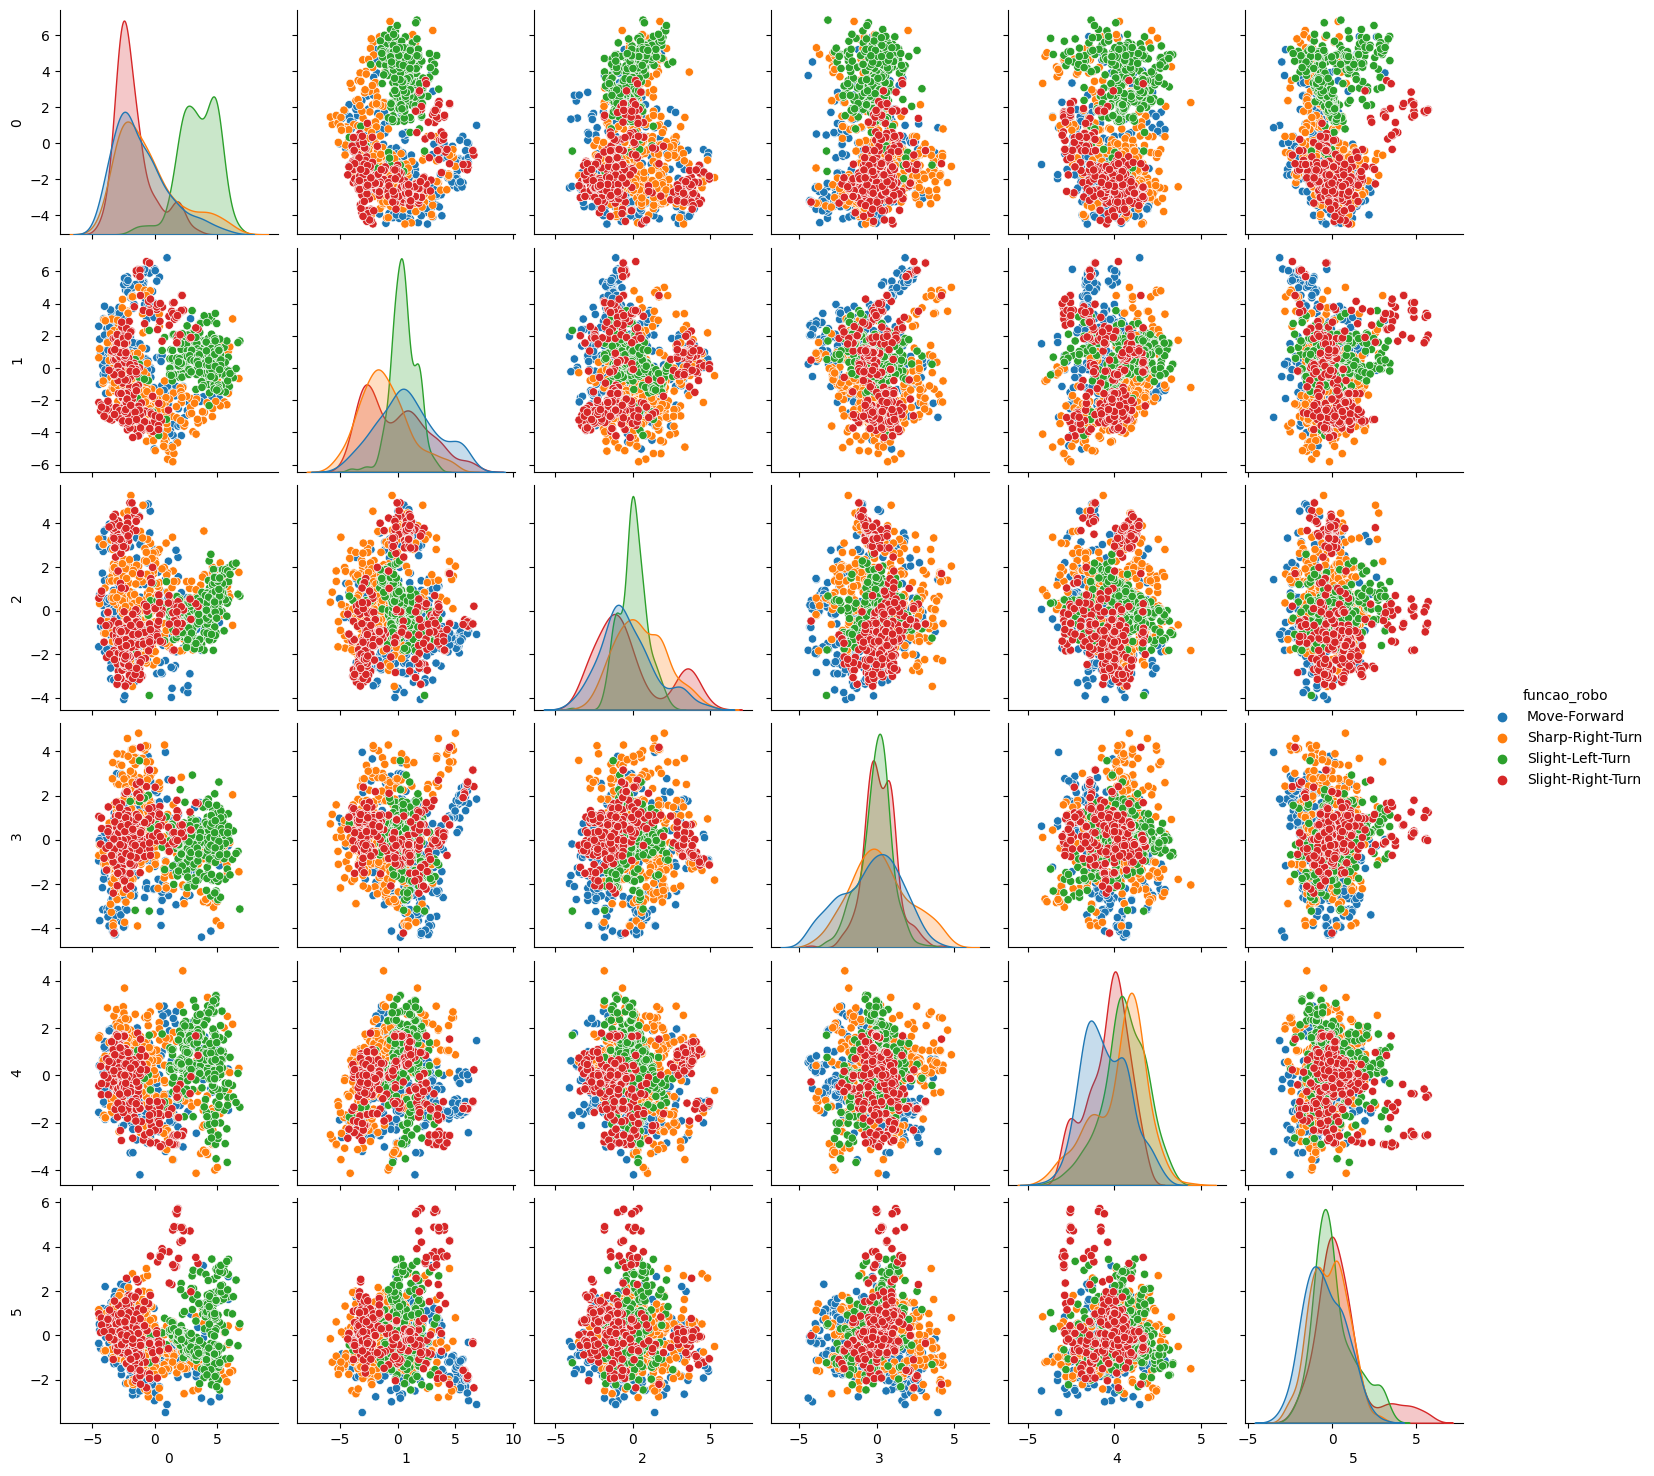

In [ ]:
sns.pairplot(pd.concat([dados_pca,y], axis = 1), hue='funcao_robo')

Não conseguimos visualizar os 4 agrupamentos completamente separados em nenhum dos gráficos acima. Entretanto, podemos observar que existe uma separação em alguns casos de uma classe comparada com as outras, o que pode ser interessante para os algoritmos de Machine Learning. O PCA nos permite visualizar dados de dimensões muito grandes analisando apenas suas principais componentes.

##Tarefa #5: Aprendizado não Supervisionado aplicado aos dados

Caso não possuirmos rótulos dos dados podemos utilizar a redução da dimensionalidade do PCA para aplicar o K-Means para fazermos análises nos nossos dados.

In [ ]:
# Definindo o modelo de clusterizacao. K-MEANS com 2 clusters
kmeans = KMeans(n_clusters=4,random_state=0)

#Implementando o K-Means nos dados:
kmeans.fit(dados_pca)

#Salvando os labels dos clusters para cada exemplo
kmeans_labels_pca = kmeans.predict(dados_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Na sequência podemos plotar os dados

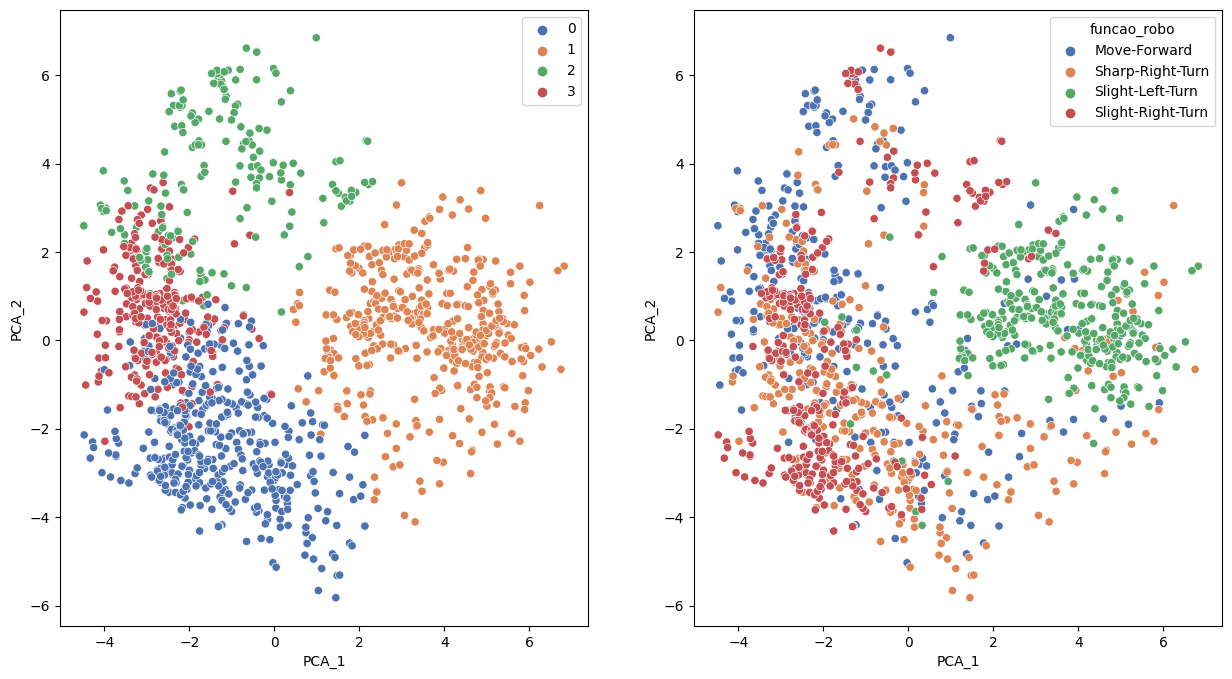

In [ ]:
# plotando os dados identificando com os seus clusters
figure = plt.figure(figsize = (15,8))

for i, label in enumerate([kmeans_labels_pca,y]):
  ax = plt.subplot(1,2,i+1)
  sns.scatterplot(x=dados_pca[0], y=dados_pca[1], hue=label, palette="deep", ax=ax)
  plt.xlabel('PCA_1')
  plt.ylabel('PCA_2')

Visualmente podemos observar que o KMEANS nãos conseguiu obter m resultado próximo a organização dos dados quando ele usou apenas os dados com sua dimensão reduzida.

Vamos usar o Adjusted Rand Score para comparar se o KMEANS conseguiu encontrar os agrupamentos conforme a coluna `"funcao_robo"`:

In [ ]:
adjusted_rand_score(kmeans_labels,y)

0.2567807150978408

A métrica ficou muito abaixo do esperado. Logo o aprendizado não supervisionado com o KMEANS não conseguiu encontrar o agrupamento natural dos dados usando o PCA

### Exercício)

Refazer a análise do K-MEANS para esse exercício usando os dados com todas as suas colunas. Para plotar o gráfico usem os dados do PCA nas colunas 0 e 1 (Similar ao que foi feito acima na aula)

- Houve diferença significativa no resultado obtido com o agrupamento usando todos os 24 sensores e com o agrupamento obtido pelo PCA?

In [ ]:
dados.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,funcao_robo
0,1.131,1.157,1.703,5.000,1.626,3.127,5.000,3.950,5.000,5.000,...,0.585,0.563,0.554,0.566,0.594,0.963,1.343,1.155,1.121,Move-Forward
1,0.894,5.000,1.613,2.150,2.975,5.000,5.000,1.413,5.000,1.515,...,0.729,0.718,0.725,0.751,0.771,0.894,0.878,0.867,0.876,Move-Forward
2,0.900,0.931,1.690,1.668,1.661,1.669,5.000,2.986,2.410,2.849,...,0.624,0.612,0.612,0.640,0.652,0.898,0.882,0.872,0.881,Move-Forward
3,1.782,1.804,1.818,5.000,5.000,5.000,1.620,1.611,1.621,1.653,...,1.062,0.717,2.767,0.669,0.659,0.668,5.000,0.732,1.770,Move-Forward
4,1.736,1.980,1.993,2.018,5.000,2.087,3.242,3.058,3.075,3.449,...,1.087,0.714,0.677,0.647,0.647,0.654,5.000,5.000,1.630,Move-Forward


In [ ]:
# Definindo o modelo de clusterizacao. K-MEANS com 2 clusters
kmeans = KMeans(n_clusters=4,random_state=0)

#Implementando o K-Means nos dados:
kmeans.fit(dados.drop(columns='funcao_robo'))

#Salvando os labels dos clusters para cada exemplo
kmeans_labels = kmeans.predict(dados.drop(columns='funcao_robo'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Na sequência podemos plotar os dados

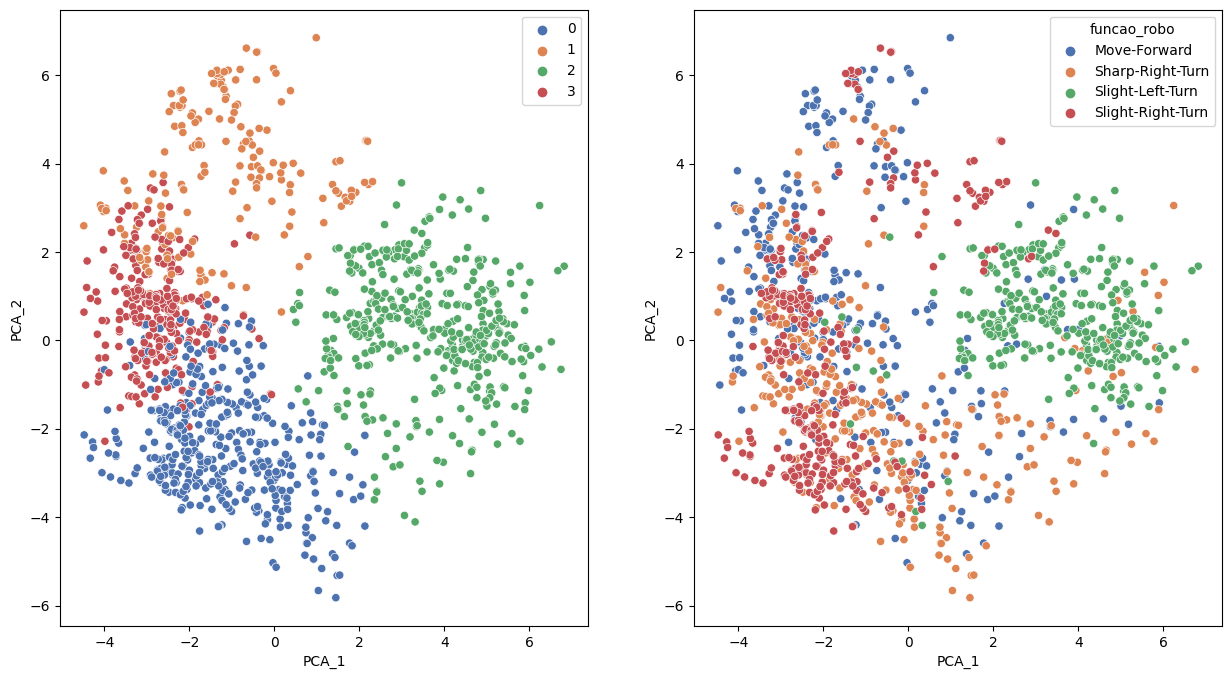

In [ ]:
# plotando os dados identificando com os seus clusters
figure = plt.figure(figsize = (15,8))

for i, label in enumerate([kmeans_labels,y]):
  ax = plt.subplot(1,2,i+1)
  sns.scatterplot(x=dados_pca[0], y=dados_pca[1], hue=label, palette="deep", ax=ax)
  plt.xlabel('PCA_1')
  plt.ylabel('PCA_2')

Visualmente podemos observar que o KMEANS nãos conseguiu obter m resultado próximo a organização dos dados quando ele usou apenas os dados com sua dimensão reduzida.

Vamos usar o Adjusted Rand Score para comparar se o KMEANS conseguiu encontrar os agrupamentos conforme a coluna `"funcao_robo"`:

In [ ]:
adjusted_rand_score(kmeans_labels,y)

0.2567807150978408

In [ ]:
adjusted_rand_score(kmeans_labels,kmeans_labels_pca)

0.9781869813135832

##Tarefa #6: Aprendizado Supervisionado aplicado aos dados

### Tarefa #1: Dividindo o conjunto de dados (Entrada/Saída e Treinamento/Teste)

In [ ]:
# Dividindo os dados em entrada e saída:
# Saída (y) --> category; Entrada (X) --> Todas as outras colunas
X = dados_pca
y = dados['funcao_robo']

# Dividindo em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

### Tarefa #2: Treinando os modelos

In [ ]:
modelo = GradientBoostingClassifier()

# Cria o GridSearchCV
parametros = {'min_samples_leaf':range(2,10), 'max_depth' : range(3,10)}
modelo_GS = GridSearchCV(modelo, parametros,)

# Esse modelo trabalha com k-fold cross validation
modelo_GS.fit(X_train, y_train)
modelo_GS.best_params_

{'max_depth': 6, 'min_samples_leaf': 8}

In [ ]:
gbc_clf = GradientBoostingClassifier(max_depth=6,min_samples_leaf=8)
gbc_clf.fit(X_train, y_train)

# Fazendo as predições
y_pred_gbc = gbc_clf.predict(X_test)

In [ ]:
# Definindo o modelo
modelo = RandomForestClassifier()

# Cria o GridSearchCV
parametros = {'max_depth':range(2,10), 'min_samples_leaf':range(2,10)}
modelo_GS = GridSearchCV(modelo, parametros)

# Esse modelo trabalha com k-fold cross validation
modelo_GS.fit(X_train, y_train)
modelo_GS.best_params_

{'max_depth': 7, 'min_samples_leaf': 2}

In [ ]:
rfc_clf = RandomForestClassifier(max_depth=7,min_samples_leaf=2)
rfc_clf.fit(X_train, y_train)

# Fazendo as predições
y_pred_rfc = rfc_clf.predict(X_test)

In [ ]:
# Definindo o modelo
modelo = SVC()

# Cria o GridSearchCV
parametros = {'kernel' : ['rbf', 'linear', 'poly', 'sigmoid']}
modelo_GS = GridSearchCV(modelo, parametros)

# Esse modelo trabalha com k-fold cross validation
modelo_GS.fit(X_train, y_train)
modelo_GS.best_params_

{'kernel': 'rbf'}

In [ ]:
# Fazendo o SVC
# kernel: Método para realizar uma divisão dos dados caso ela não exista
svc_clf = SVC(kernel='poly', probability = True)
svc_clf.fit(X_train, y_train)

# Fazendo as predições
y_pred_svc = svc_clf.predict(X_test)

### Tarefa #3: Métricas de desempenho do modelo

Obtendo as matrizes de confusão:

In [ ]:
labels_proj = dados['funcao_robo'].unique()
labels_proj

array(['Move-Forward', 'Sharp-Right-Turn', 'Slight-Left-Turn',
       'Slight-Right-Turn'], dtype=object)

In [ ]:
previsoes_modelos = {'Random Forest' : y_pred_gbc,
                     'RFC' : y_pred_rfc,
                     'SVC' : y_pred_svc}

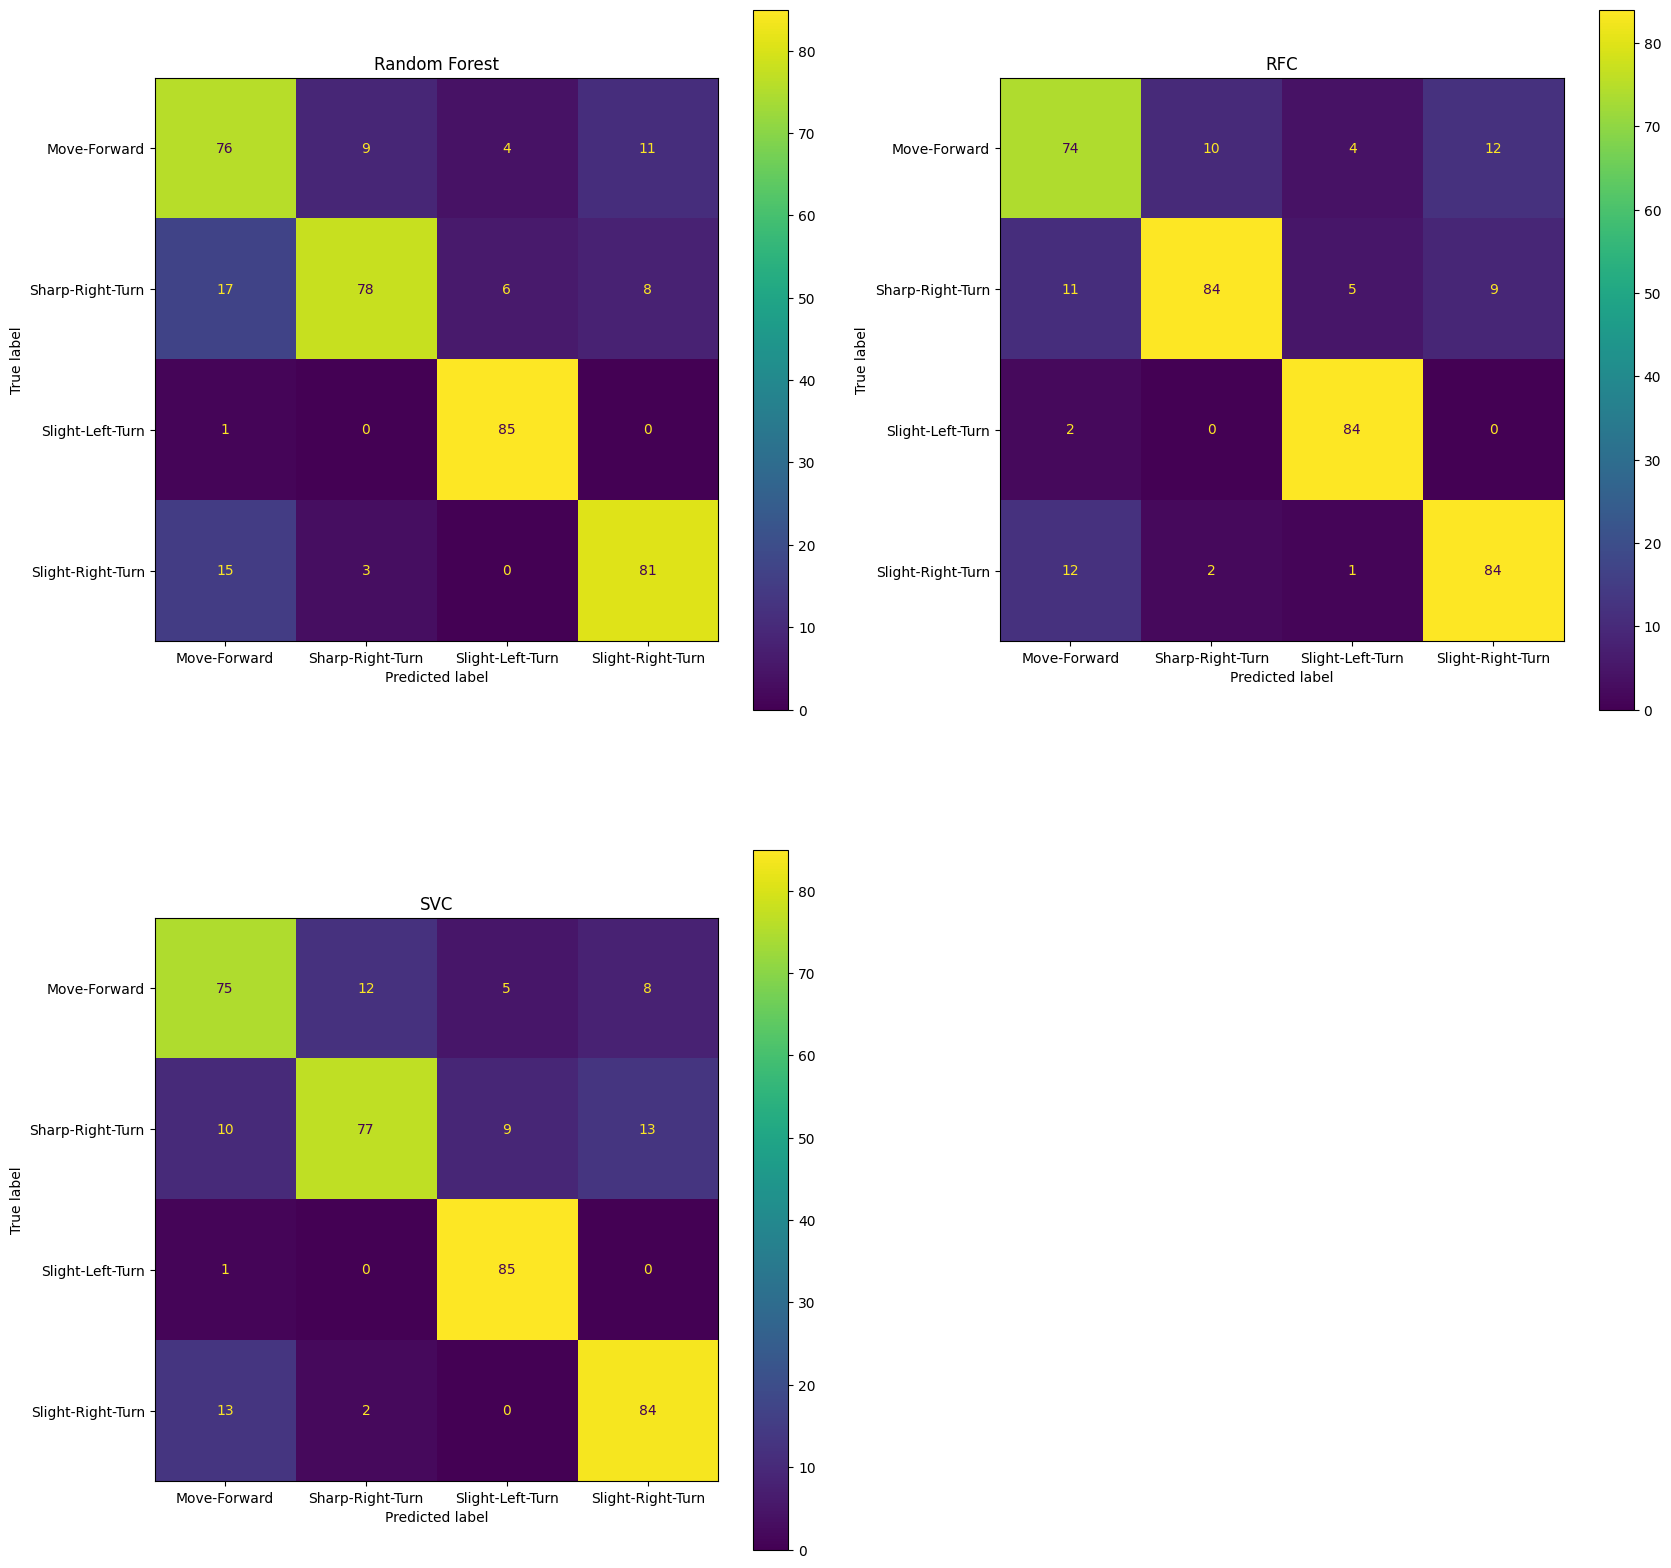

In [ ]:
figure = plt.figure(figsize=(20,20))
for i, (nome_clf, y_pred) in enumerate(previsoes_modelos.items()):
  cm = confusion_matrix(y_true=y_test,
                        y_pred=y_pred,
                        labels=labels_proj)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=labels_proj)
  eixo = plt.subplot(2,2,i+1)
  disp.plot(ax=eixo,
            values_format='d')
  eixo.set_title(nome_clf)


Obtendo as métricas:

In [ ]:
for nome_clf, y_pred in previsoes_modelos.items():
  print('-'*60)
  print(nome_clf)
  print(classification_report(y_true=y_test,
                              y_pred=y_pred))

------------------------------------------------------------
Random Forest
                   precision    recall  f1-score   support

     Move-Forward       0.70      0.76      0.73       100
 Sharp-Right-Turn       0.87      0.72      0.78       109
 Slight-Left-Turn       0.89      0.99      0.94        86
Slight-Right-Turn       0.81      0.82      0.81        99

         accuracy                           0.81       394
        macro avg       0.82      0.82      0.82       394
     weighted avg       0.82      0.81      0.81       394

------------------------------------------------------------
RFC
                   precision    recall  f1-score   support

     Move-Forward       0.75      0.74      0.74       100
 Sharp-Right-Turn       0.88      0.77      0.82       109
 Slight-Left-Turn       0.89      0.98      0.93        86
Slight-Right-Turn       0.80      0.85      0.82        99

         accuracy                           0.83       394
        macro avg       0.83 

## Exercício)

Para os dados dessa aula, crie dois modelos de M.L. (Random Forest e GBC) fazendo a análise do PCA para que o explained_variance_ratio_ tenha até 90% da variância total dos dados.

### Tarefa #1: Utilizando o PCA para redimensionar os dados

In [ ]:
# Dividindo os dados em entrada e saída:
X = dados.drop(columns=["funcao_robo"])
# Criando uma variavel para os labels
y = dados["funcao_robo"]

In [ ]:
# Criando um modelo do PCA sem definir o número de componentes
pca = PCA()
pca.fit(X)

PCA()

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.22069013, 0.37301415, 0.45554641, 0.51997967, 0.57459134,
       0.6233498 , 0.66666317, 0.70536163, 0.73811789, 0.76682792,
       0.79218068, 0.81659884, 0.83948969, 0.86140635, 0.88077988,
       0.89833457, 0.91496879, 0.93022409, 0.9444051 , 0.95760648,
       0.97049821, 0.98201261, 0.99210337, 1.        ])

Vamos considerar 16 colunas para termos até 90% da variância dos dados:

In [ ]:
pca = PCA(n_components=16)
pca_res = pca.fit_transform(X)

In [ ]:
dados_pca_ex = pd.DataFrame(pca_res)
dados_pca_ex.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-4.193178,1.094114,1.711579,-2.168172,-1.699822,0.310514,-0.618367,-1.340044,1.050564,1.731665,-0.231297,-0.754667,-0.416507,-0.129076,0.512588,-1.617373
1,-2.476192,1.966253,-4.087785,-1.981742,-0.544922,-0.280445,0.490257,2.127737,-0.773939,-0.041995,-1.329926,-0.099406,0.791494,-0.170434,-0.467041,-0.553479
2,-2.345502,4.842058,-1.208738,1.109113,-1.503345,-0.916549,-0.760020,1.050677,0.199136,-0.280346,0.705274,-0.276418,-0.178282,-0.216472,0.817846,0.638187
3,1.254038,-3.877684,-0.242924,0.990442,-1.971816,0.232882,-1.507951,-0.721203,-0.692605,-0.253997,-2.556585,0.183682,1.064846,-1.000332,-1.519861,0.134987
4,-0.392244,-1.518591,3.561880,1.748911,-2.539860,-2.020588,0.720890,1.543273,0.909409,2.050201,0.628859,-0.498527,0.282043,-0.853921,0.310729,1.612809


###Tarefa #2: Aprendizado Supervisionado

#### Tarefa #1: Dividindo o conjunto de dados (Entrada/Saída e Treinamento/Teste)

In [ ]:
# Dividindo os dados em entrada e saída:
# Saída (y) --> category; Entrada (X) --> Todas as outras colunas
X = dados_pca_ex
y = dados['funcao_robo']

# Dividindo em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

#### Tarefa #2: Treinando os modelos

In [ ]:
modelo = GradientBoostingClassifier()

# Cria o GridSearchCV
parametros = {'min_samples_leaf':range(2,10), 'max_depth' : range(3,10)}
modelo_GS = GridSearchCV(modelo, parametros,)

# Esse modelo trabalha com k-fold cross validation
modelo_GS.fit(X_train, y_train)
modelo_GS.best_params_

{'max_depth': 7, 'min_samples_leaf': 9}

In [ ]:
gbc_clf = GradientBoostingClassifier(max_depth=7,min_samples_leaf=9)
gbc_clf.fit(X_train, y_train)

# Fazendo as predições
y_pred_gbc = gbc_clf.predict(X_test)

In [ ]:
# Definindo o modelo
modelo = RandomForestClassifier()

# Cria o GridSearchCV
parametros = {'max_depth':range(2,10), 'min_samples_leaf':range(2,10)}
modelo_GS = GridSearchCV(modelo, parametros)

# Esse modelo trabalha com k-fold cross validation
modelo_GS.fit(X_train, y_train)
modelo_GS.best_params_

{'max_depth': 8, 'min_samples_leaf': 3}

In [ ]:
rfc_clf = RandomForestClassifier(max_depth=8,min_samples_leaf=3)
rfc_clf.fit(X_train, y_train)

# Fazendo as predições
y_pred_rfc = rfc_clf.predict(X_test)

In [ ]:
# Definindo o modelo
modelo = SVC()

# Cria o GridSearchCV
parametros = {'kernel' : ['rbf', 'linear', 'poly', 'sigmoid']}
modelo_GS = GridSearchCV(modelo, parametros)

# Esse modelo trabalha com k-fold cross validation
modelo_GS.fit(X_train, y_train)
modelo_GS.best_params_

{'kernel': 'rbf'}

In [ ]:
# Fazendo o SVC
# kernel: Método para realizar uma divisão dos dados caso ela não exista
svc_clf = SVC(kernel='poly', probability = True)
svc_clf.fit(X_train, y_train)

# Fazendo as predições
y_pred_svc = svc_clf.predict(X_test)

#### Tarefa #3: Métricas de desempenho do modelo

Obtendo as matrizes de confusão:

In [ ]:
labels_proj = dados['funcao_robo'].unique()
labels_proj

array(['Move-Forward', 'Sharp-Right-Turn', 'Slight-Left-Turn',
       'Slight-Right-Turn'], dtype=object)

In [ ]:
previsoes_modelos = {'Random Forest' : y_pred_gbc,
                     'GBC' : y_pred_rfc,
                     'SVM': y_pred_svc}

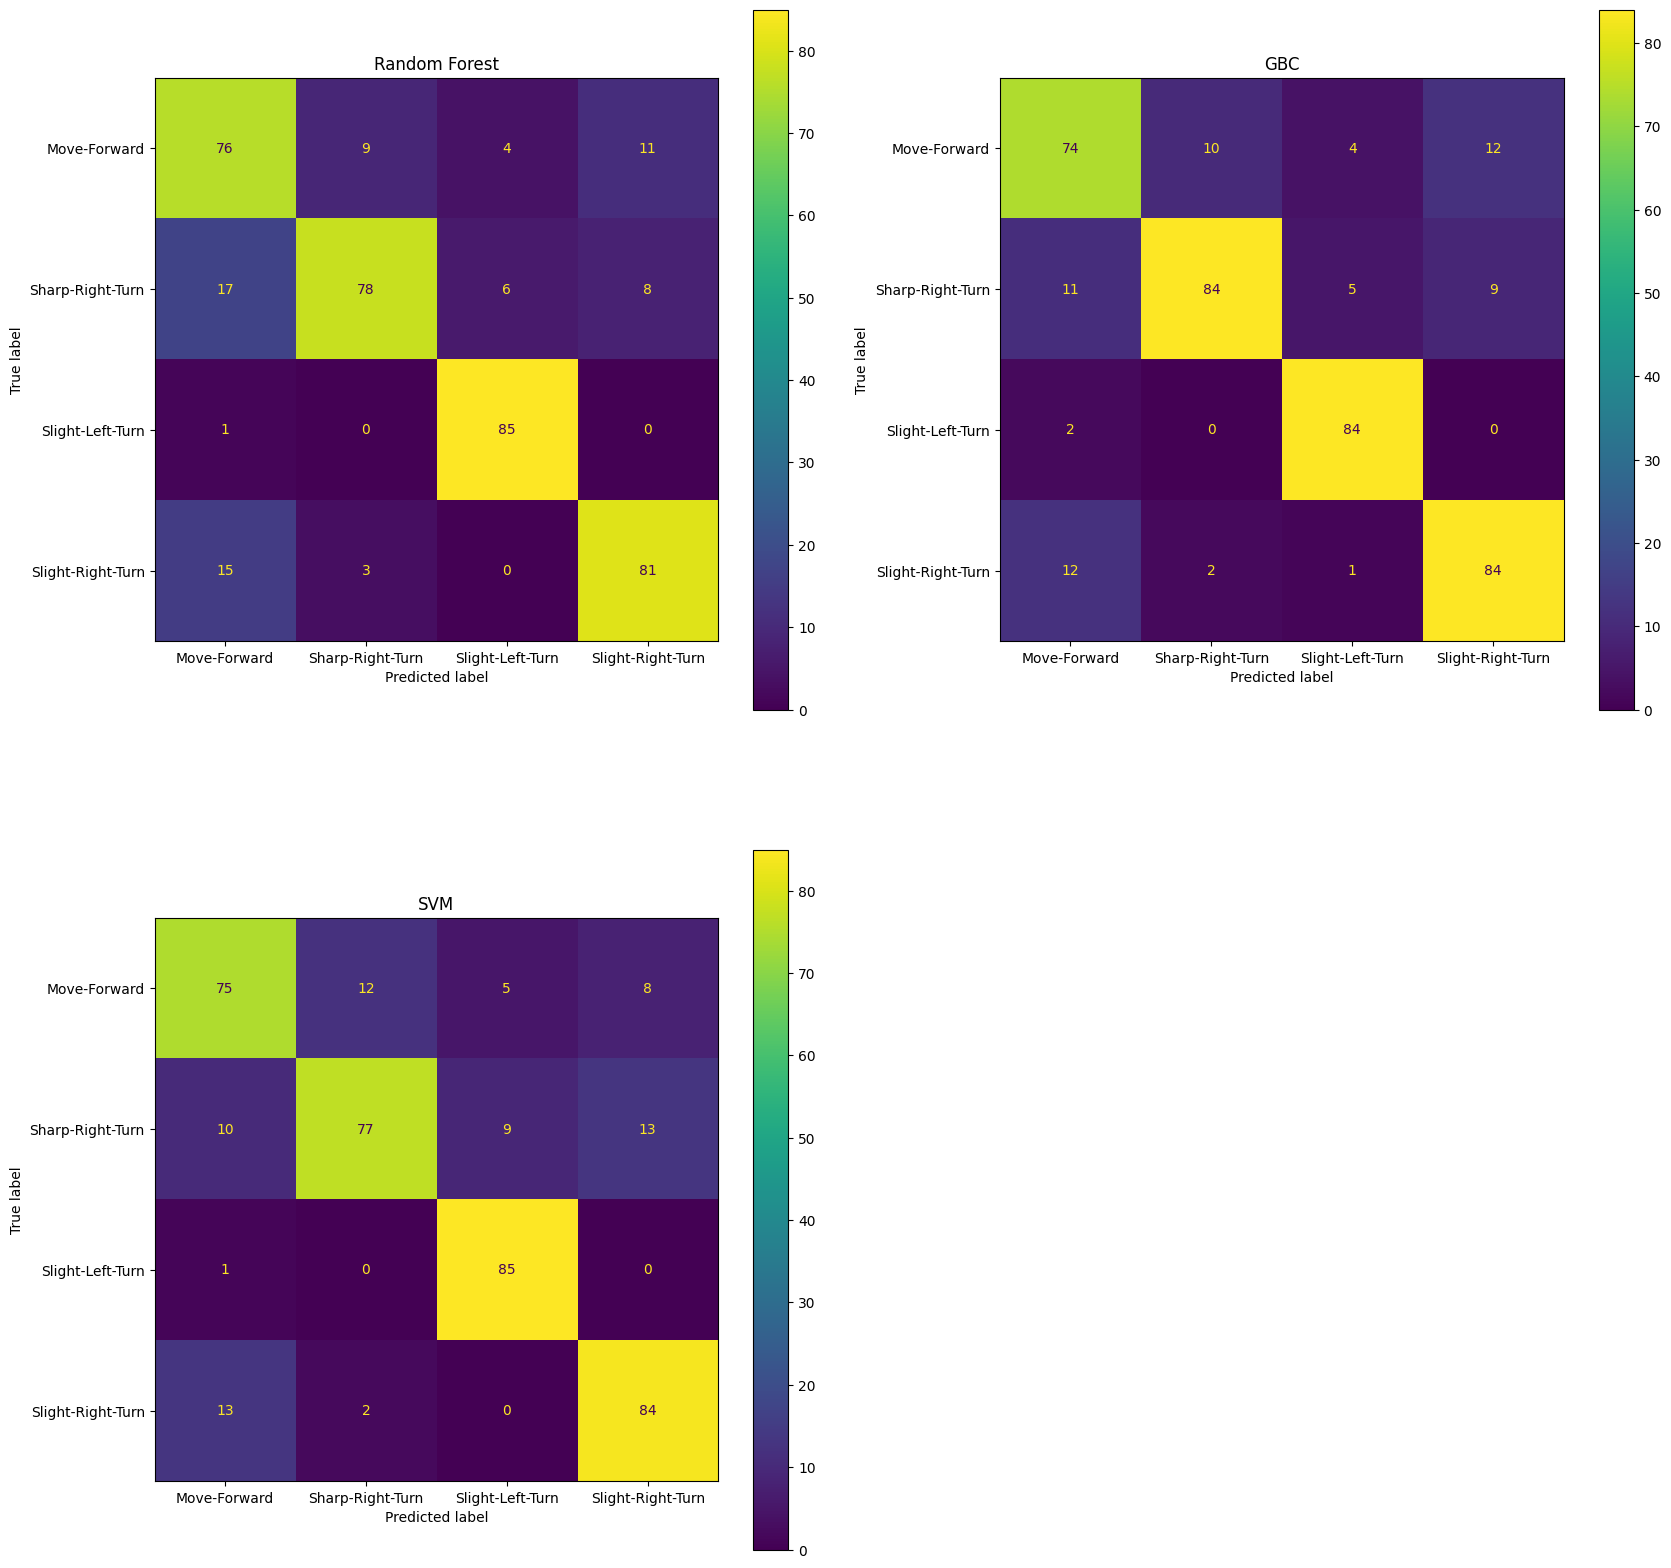

In [ ]:
figure = plt.figure(figsize=(20,20))
for i, (nome_clf, y_pred) in enumerate(previsoes_modelos.items()):
  cm = confusion_matrix(y_true=y_test,
                        y_pred=y_pred,
                        labels=labels_proj)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=labels_proj)
  eixo = plt.subplot(2,2,i+1)
  disp.plot(ax=eixo,
            values_format='d')
  eixo.set_title(nome_clf)


Obtendo as métricas:

In [ ]:
for nome_clf, y_pred in previsoes_modelos.items():
  print('-'*60)
  print(nome_clf)
  print(classification_report(y_true=y_test,
                              y_pred=y_pred))

------------------------------------------------------------
Random Forest
                   precision    recall  f1-score   support

     Move-Forward       0.70      0.76      0.73       100
 Sharp-Right-Turn       0.87      0.72      0.78       109
 Slight-Left-Turn       0.89      0.99      0.94        86
Slight-Right-Turn       0.81      0.82      0.81        99

         accuracy                           0.81       394
        macro avg       0.82      0.82      0.82       394
     weighted avg       0.82      0.81      0.81       394

------------------------------------------------------------
GBC
                   precision    recall  f1-score   support

     Move-Forward       0.75      0.74      0.74       100
 Sharp-Right-Turn       0.88      0.77      0.82       109
 Slight-Left-Turn       0.89      0.98      0.93        86
Slight-Right-Turn       0.80      0.85      0.82        99

         accuracy                           0.83       394
        macro avg       0.83 